In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
input_file = 'star_dataset/6_class_csv.csv'
data_wt_label=pd.read_csv(input_file, header = 0)

In [5]:
data_wt_label.head()

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M

In [6]:
### Missing values in each column ###
data_wt_label.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [7]:
data_wt_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [8]:
data_wt_label.describe()

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     107188.361635    237.157781   
std        9552.425037     179432.244940    517.155763   
min        1939.000000          0.000080      0.008400   
25%        3344.250000          0.000865      0.102750   
50%        5776.000000          0.070500      0.762500   
75%       15055.500000     198050.000000     42.750000   
max       40000.000000     849420.000000   1948.500000   

       Absolute magnitude(Mv)   Star type  
count              240.000000  240.000000  
mean                 4.382396    2.500000  
std                 10.532512    1.711394  
min                -11.920000    0.000000  
25%                 -6.232500    1.000000  
50%                  8.313000    2.500000  
75%                 13.697500    4.000000  
max                 20.060000    5.000000

In [9]:
### checking for class imbalance ###
data_wt_label['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

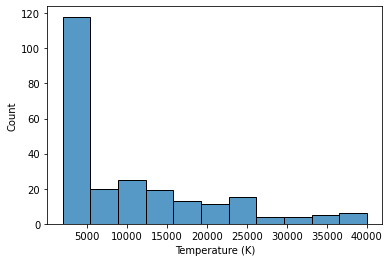

In [10]:
#Histogram of all features
sns.histplot(data_wt_label["Temperature (K)"])
plt.show()

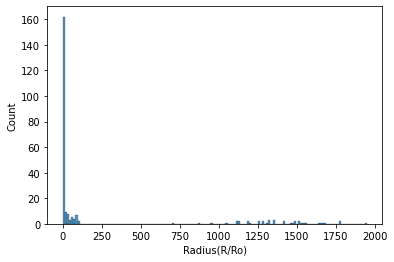

In [11]:
sns.histplot(data_wt_label["Radius(R/Ro)"])
plt.show()

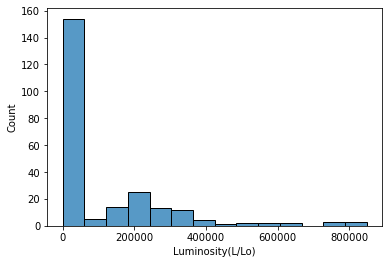

In [12]:
sns.histplot(data_wt_label["Luminosity(L/Lo)"])
plt.show()

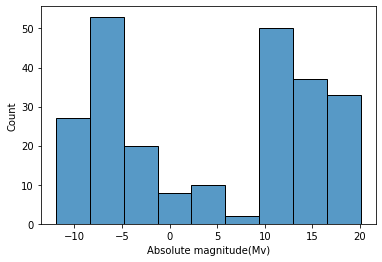

In [13]:
sns.histplot(data_wt_label["Absolute magnitude(Mv)"])
plt.show()

C:\Users\JasonW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


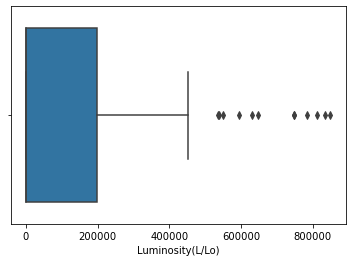

In [14]:
sns.boxplot(data_wt_label["Luminosity(L/Lo)"])
plt.show()

C:\Users\JasonW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


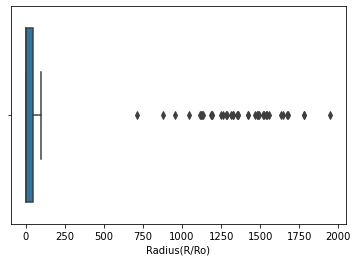

In [15]:
sns.boxplot(data_wt_label["Radius(R/Ro)"])
plt.show()

C:\Users\JasonW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


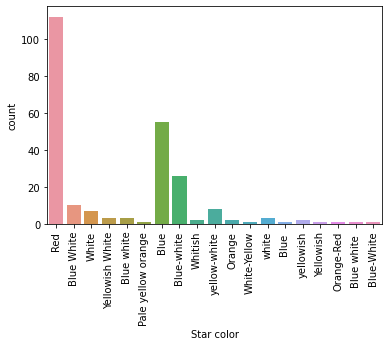

In [16]:
ax = sns.countplot(data_wt_label["Star color"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [17]:
#data_wt_label.hist(figsize=(15,12),bins = 15)
#plt.title("Features Distribution")
#plt.show()

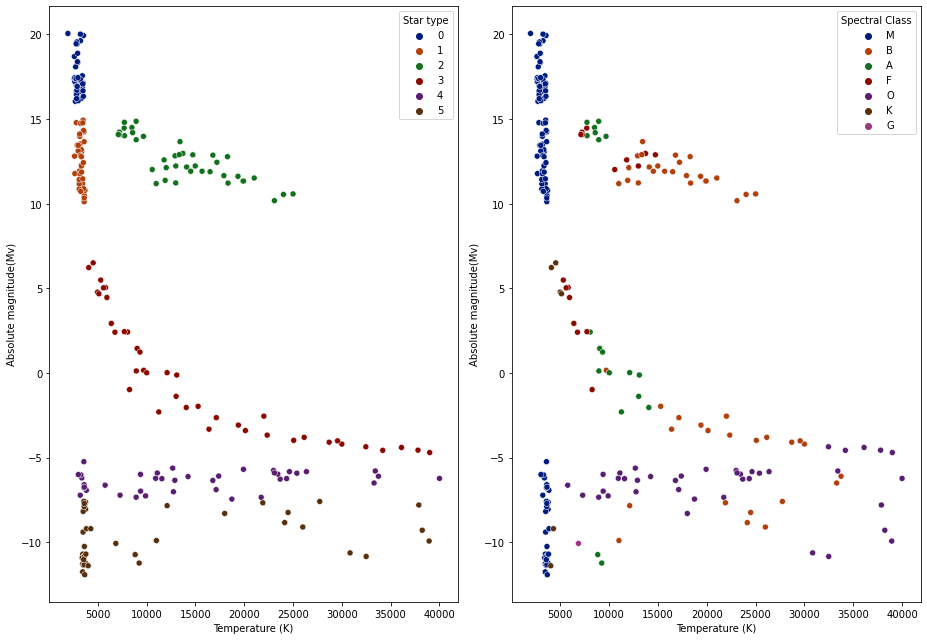

In [18]:
### visualize HR-diagram with our data ###
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,9))
sns.scatterplot(x='Temperature (K)',y='Absolute magnitude(Mv)',data=data_wt_label,hue='Star type',ax=ax[0],palette='dark')
sns.scatterplot(x='Temperature (K)',y='Absolute magnitude(Mv)',data=data_wt_label,hue='Spectral Class',ax=ax[1],palette='dark')
plt.tight_layout()
plt.show()

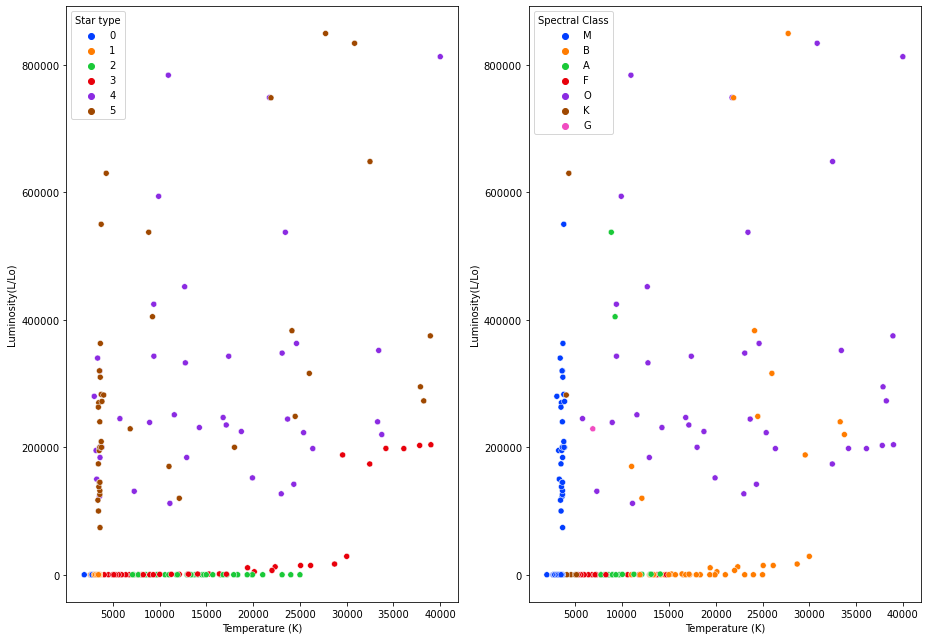

In [19]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,9))
sns.scatterplot(x='Temperature (K)',y='Luminosity(L/Lo)',data=data_wt_label,hue='Star type',ax=ax[0],palette='bright')
sns.scatterplot(x='Temperature (K)',y='Luminosity(L/Lo)',data=data_wt_label,hue='Spectral Class',ax=ax[1],palette='bright')
plt.tight_layout()
plt.show()

In [20]:
data_wt_label

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Class  
0            0        Red              M  
1            0        Red              M  
2            0        Red              M  
3            0        Red              M  
4            0        Red              M  
..         ...        ...            ...  
235          5       Blue              O  
236          5       Blue              O  
237          5      White              A  
238          5      White              A  
239          5       Blue              O  

[240 rows x 7 columns]

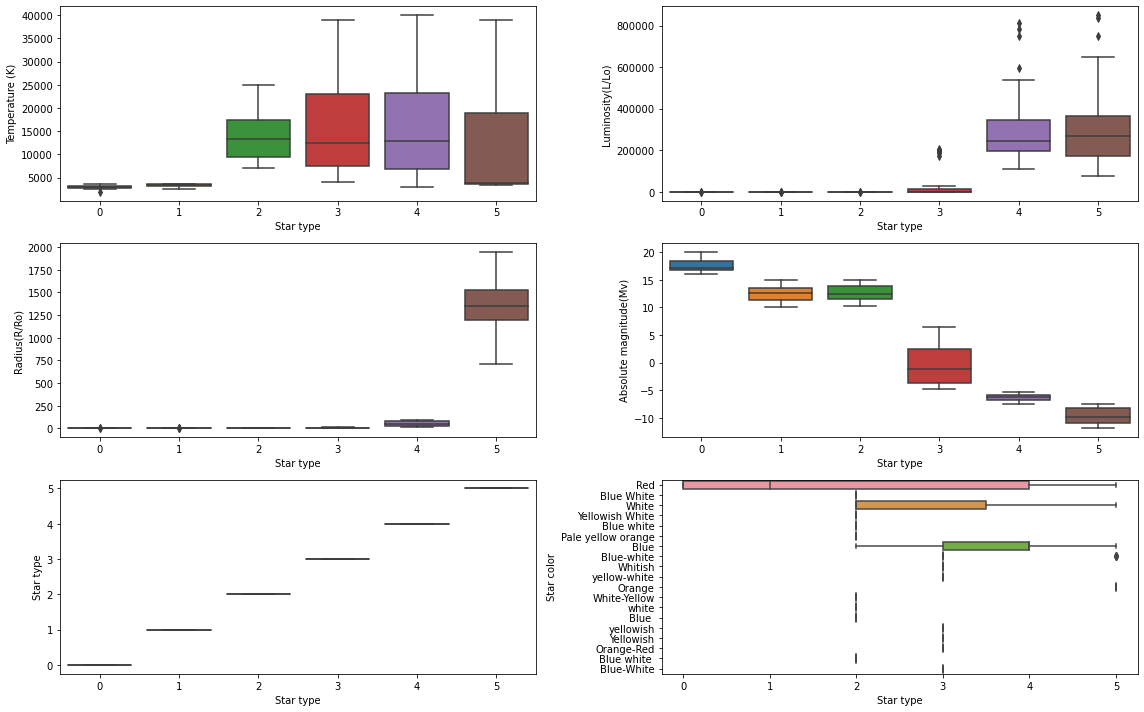

In [21]:
fig,ax = plt.subplots(nrows = 3, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(data_wt_label.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = data_wt_label["Star type"], y = data_wt_label[data_wt_label.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

#### Target [Star Type]
Brown Dwarf -> Star Type = 0 \
Red Dwarf -> Star Type = 1 \
White Dwarf-> Star Type = 2 \
Main Sequence -> Star Type = 3 \
Supergiant -> Star Type = 4 \
Hypergiant -> Star Type = 5

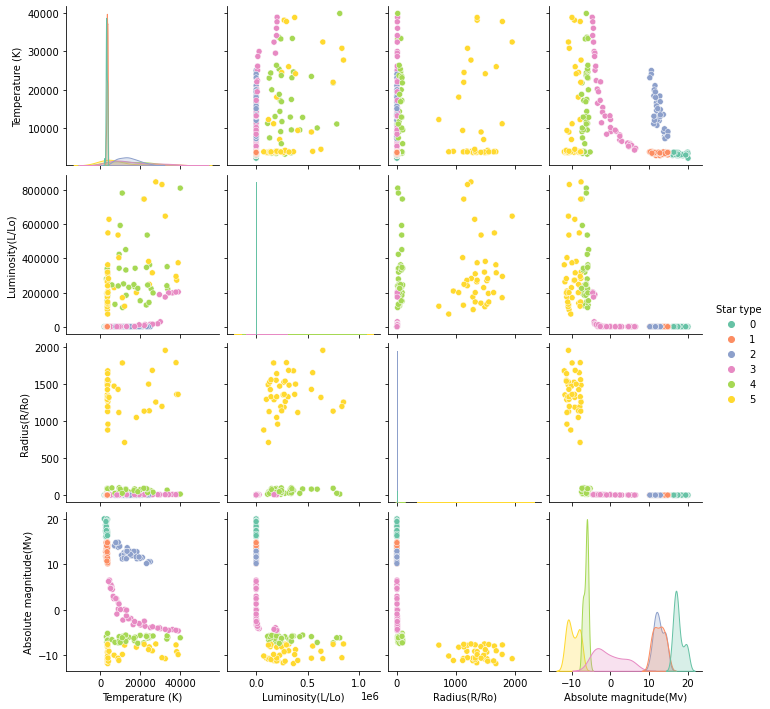

In [22]:
sns.pairplot(data=data_wt_label,hue="Star type",palette="Set2")
plt.show()

In [23]:
### Split dataframe into categorical and numeric features ### 
df_cat = data_wt_label.select_dtypes(exclude=np.number)
df_num = data_wt_label.select_dtypes(include=np.number)

In [24]:
df_cat.head(2)

Star color Spectral Class
0        Red              M
1        Red              M

In [25]:
df_num.head(2)

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068            0.0024        0.1700                   16.12   
1             3042            0.0005        0.1542                   16.60   

   Star type  
0          0  
1          0

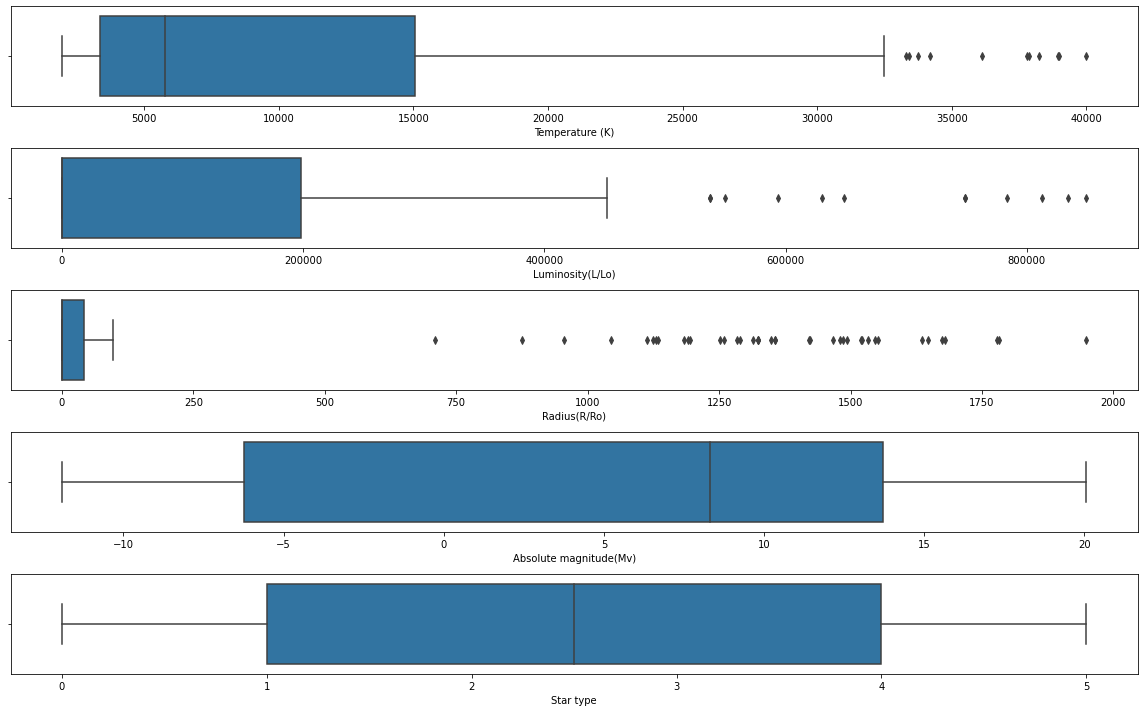

In [26]:
### visualizing outliers ###
fig,ax=plt.subplots(len(df_num.columns),figsize=(16,10))
for i in range(len(df_num.columns)):
    sns.boxplot(x = df_num.iloc[:,i],ax=ax[i],hue=data_wt_label['Star type'])
    plt.tight_layout()
plt.show()

In [27]:
### Scaling of features ###
scaler = StandardScaler()
df_scaled_num = pd.DataFrame(scaler.fit_transform(df_num),columns = df_num.columns)
df_scaled_num.head()

Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0        -0.779382         -0.598624     -0.459210                1.116745   
1        -0.782110         -0.598624     -0.459241                1.162414   
2        -0.828477         -0.598624     -0.459342                1.362213   
3        -0.807496         -0.598624     -0.459229                1.167171   
4        -0.897819         -0.598624     -0.459340                1.491607   

   Star type  
0   -1.46385  
1   -1.46385  
2   -1.46385  
3   -1.46385  
4   -1.46385

In [28]:
### Encoding categorical variables ###
encoded_cat=pd.get_dummies(df_cat,drop_first=True)
encoded_cat.head()

Star color_Blue   Star color_Blue White  Star color_Blue white  \
0                 0                      0                      0   
1                 0                      0                      0   
2                 0                      0                      0   
3                 0                      0                      0   
4                 0                      0                      0   

   Star color_Blue white   Star color_Blue-White  Star color_Blue-white  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   Star color_Orange  Star color_Orange-Red  Star color_Pale yellow orange  \
0                  0                      0                              0   
1                  0                      0                              0   
2                  0                      0                              0   
3                  0                      0                              0   
4                  0                      0                              0   

   Star color_Red  ...  Star color_Yellowish White  Star color_white  \
0               1  ...                           0                 0   
1               1  ...                           0                 0   
2               1  ...                           0                 0   
3               1  ...                           0                 0   
4               1  ...                           0                 0   

   Star color_yellow-white  Star color_yellowish  Spectral Class_B  \
0                        0                     0                 0   
1                        0                     0                 0   
2                        0                     0                 0   
3                        0                     0                 0   
4                        0                     0                 0   

   Spectral Class_F  Spectral Class_G  Spectral Class_K  Spectral Class_M  \
0                 0                 0                 0                 1   
1                 0                 0                 0                 1   
2                 0                 0                 0                 1   
3                 0                 0                 0                 1   
4                 0                 0                 0                 1   

   Spectral Class_O  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 24 columns]

In [29]:
### Combining scaled numeric variables and encoded categorical variables ###
df = pd.concat([encoded_cat,df_scaled_num],axis=1)
df.head()

Star color_Blue   Star color_Blue White  Star color_Blue white  \
0                 0                      0                      0   
1                 0                      0                      0   
2                 0                      0                      0   
3                 0                      0                      0   
4                 0                      0                      0   

   Star color_Blue white   Star color_Blue-White  Star color_Blue-white  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   Star color_Orange  Star color_Orange-Red  Star color_Pale yellow orange  \
0                  0                      0                              0   
1                  0                      0                              0   
2                  0                      0                              0   
3                  0                      0                              0   
4                  0                      0                              0   

   Star color_Red  ...  Spectral Class_F  Spectral Class_G  Spectral Class_K  \
0               1  ...                 0                 0                 0   
1               1  ...                 0                 0                 0   
2               1  ...                 0                 0                 0   
3               1  ...                 0                 0                 0   
4               1  ...                 0                 0                 0   

   Spectral Class_M  Spectral Class_O  Temperature (K)  Luminosity(L/Lo)  \
0                 1                 0        -0.779382         -0.598624   
1                 1                 0        -0.782110         -0.598624   
2                 1                 0        -0.828477         -0.598624   
3                 1                 0        -0.807496         -0.598624   
4                 1                 0        -0.897819         -0.598624   

   Radius(R/Ro)  Absolute magnitude(Mv)  Star type  
0     -0.459210                1.116745   -1.46385  
1     -0.459241                1.162414   -1.46385  
2     -0.459342                1.362213   -1.46385  
3     -0.459229                1.167171   -1.46385  
4     -0.459340                1.491607   -1.46385  

[5 rows x 29 columns]

In [30]:
### Removing labels ###
X = df.drop('Star type',axis=1)
X.head()

Star color_Blue   Star color_Blue White  Star color_Blue white  \
0                 0                      0                      0   
1                 0                      0                      0   
2                 0                      0                      0   
3                 0                      0                      0   
4                 0                      0                      0   

   Star color_Blue white   Star color_Blue-White  Star color_Blue-white  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   

   Star color_Orange  Star color_Orange-Red  Star color_Pale yellow orange  \
0                  0                      0                              0   
1                  0                      0                              0   
2                  0                      0                              0   
3                  0                      0                              0   
4                  0                      0                              0   

   Star color_Red  ...  Spectral Class_B  Spectral Class_F  Spectral Class_G  \
0               1  ...                 0                 0                 0   
1               1  ...                 0                 0                 0   
2               1  ...                 0                 0                 0   
3               1  ...                 0                 0                 0   
4               1  ...                 0                 0                 0   

   Spectral Class_K  Spectral Class_M  Spectral Class_O  Temperature (K)  \
0                 0                 1                 0        -0.779382   
1                 0                 1                 0        -0.782110   
2                 0                 1                 0        -0.828477   
3                 0                 1                 0        -0.807496   
4                 0                 1                 0        -0.897819   

   Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  
0         -0.598624     -0.459210                1.116745  
1         -0.598624     -0.459241                1.162414  
2         -0.598624     -0.459342                1.362213  
3         -0.598624     -0.459229                1.167171  
4         -0.598624     -0.459340                1.491607  

[5 rows x 28 columns]

In [31]:
### PCA ###
scaler=StandardScaler()
#pca = PCA()
#X_new = pca.fit_transform(X)
#pca.get_covariance()

In [32]:
scaler.fit(X)

StandardScaler()

In [33]:
scaled_data=scaler.transform(X)

In [34]:
pca=PCA(n_components=2)

In [35]:
pca.fit(scaled_data)

PCA(n_components=2)

In [36]:
x_pca=pca.transform(scaled_data)

In [37]:
x_pca.shape

(240, 2)

Text(0, 0.5, 'comp2')

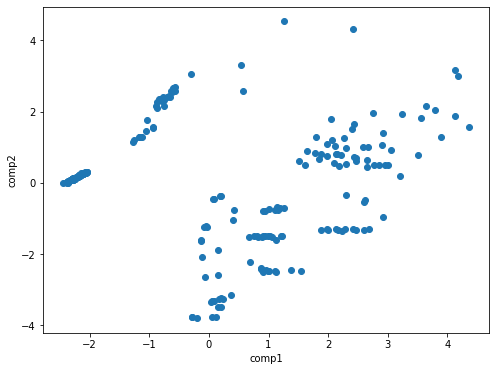

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel("comp1")
plt.ylabel("comp2")

In [39]:
#explained_variance=pca.explained_variance_ratio_
#explained_variance

In [40]:
### Scree plot ###

In [41]:
### PCA plot ###

In [42]:
#K-Means
km = KMeans(n_clusters=6)

In [43]:
km.fit(X)

KMeans(n_clusters=6)

In [44]:
y_predicted = km.fit_predict(X)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 3, 1, 5, 5, 5, 1, 5, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       1, 1, 1, 1, 4, 1, 1, 5, 5, 5, 5, 5, 1, 1, 5, 5, 2, 2, 2, 3, 2, 2,
       5, 2, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 1, 4, 1, 4, 4,
       1, 5, 5, 5, 5, 5, 5, 5, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3])

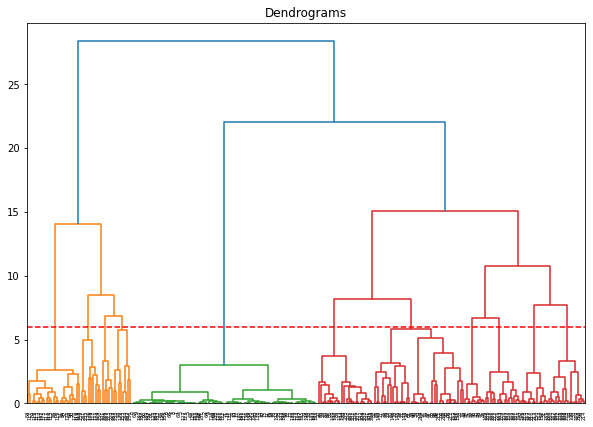

In [48]:
#hierarchical
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [49]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 2, 2, 2, 3, 2, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 3, 3, 3, 1, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 4, 4, 0, 0, 4, 4,
       0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 3, 3, 1,
       3, 2, 2, 0, 2, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

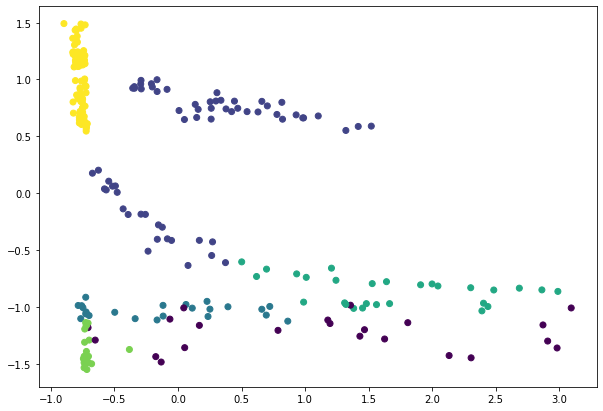

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(X['Temperature (K)'], X['Absolute magnitude(Mv)'], c=cluster.labels_) 

In [61]:
from sklearn.ensemble import IsolationForest

In [62]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(X)

IsolationForest(contamination=0.1, n_estimators=50)

In [63]:
predicted = model.predict(X)
predicted

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1